In [0]:
#!pip install wordcloud

In [29]:
import pandas as pd
import spacy
import nltk
nltk.download('punkt')
nltk.download('wordnet')
import re
from sklearn.feature_extraction.text import TfidfVectorizer
import unicodedata
from collections import Counter

from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt

import networkx as nx

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [0]:
nlp = spacy.load('pt_core_news_sm')
stopwords = nlp.Defaults.stop_words
stopwords.update("a", "você", "e", "n", "a gente", "que")

wn = nltk.WordNetLemmatizer()

In [31]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
#leitura dos txts e concatenando 
path = '/content/drive/My Drive/Colab Notebooks/audição/FIAP - pythonAndre/7ia - audiosTranscritos/MELHORES'
from nltk.corpus import PlaintextCorpusReader
corpus = PlaintextCorpusReader(path, '.*')
textomelhores = corpus.raw()

In [0]:
#Tira caracteres especiais, numeros e pulos de linha
textomelhores = textomelhores.translate({ord(i): None for i in '[].,%\'0123456789'})
textomelhores = textomelhores.replace('\\n','')

#Remove stopwords
textomelhores = ' '.join([word for word in textomelhores.split() if word not in stopwords])

In [0]:
# !python -m spacy download pt_core_news_sm

In [35]:
#Função para resolver plurais irregulares
def regexsub(word):
  word = re.sub(r'oes(?!.)', 'ao', word)
  word = re.sub(r'\bredes\b', 'rede', word)
  word = re.sub(r'(?<![pmc])ais\b', 'al', word)
  return word

# Teste
print(regexsub('sociais'))
print(regexsub('redes'))

social
rede


In [36]:
#Função para retirar acentuação e caracteres especiais como o ç
def strip_accents(text):
    try:
        text = unicode(text, 'utf-8')
    except NameError: # unicode is a default on python 3 
        pass
    text = unicodedata.normalize('NFD', text)\
           .encode('ascii', 'ignore')\
           .decode("utf-8")
    return str(text)

#Teste
strip_accents('ãàáâèéêìíòóõúüç')

'aaaaeeeiiooouuc'

In [0]:
##V2
###TESTE###
def clean_text(text):
    tokens = nltk.word_tokenize(textomelhores)
    nostop = [word for word in tokens if word not in stopwords]
    sem_acento = [strip_accents(word) for word in nostop]    
    text = [regexsub(word) for word in sem_acento]
    return text

In [38]:
#Teste da tokenização
tokens = nltk.word_tokenize(textomelhores)
print(type(tokens))
print(len(tokens))

<class 'list'>
2055


In [39]:
#Teste de remover acentuação
sem_acento = [strip_accents(word) for word in tokens]
print(len(sem_acento))
print(sem_acento[:25])

2055
['Voce', 'acredita', 'rede', 'sociais', 'digitais', 'ajudam', 'aumentar', 'exposicoes', 'extremistas', 'opiniao', 'Acredito', 'Isso', 'usuarios', 'influenciado', 'facilmente', 'opinioes', 'terceiros', 'investigar', 'opiniao', 'fonte', 'fundamento', 'ajudando', 'espalhar', 'cliques', 'ninhosAcredito']


In [40]:
#Teste remover stopwords
nostop = [word for word in sem_acento if word not in stopwords]
print(type(nostop))
print(len(nostop))
print(nostop[:25])

<class 'list'>
2054
['Voce', 'acredita', 'rede', 'sociais', 'digitais', 'ajudam', 'aumentar', 'exposicoes', 'extremistas', 'opiniao', 'Acredito', 'Isso', 'usuarios', 'influenciado', 'facilmente', 'opinioes', 'terceiros', 'investigar', 'opiniao', 'fonte', 'fundamento', 'ajudando', 'espalhar', 'cliques', 'ninhosAcredito']


In [41]:
#Teste de remoção de plurais irregulares
text = [regexsub(word) for word in nostop]
print(type(text))
print(len(text))
print(text[:25])

<class 'list'>
2054
['Voce', 'acredita', 'rede', 'social', 'digital', 'ajudam', 'aumentar', 'exposicao', 'extremistas', 'opiniao', 'Acredito', 'Isso', 'usuarios', 'influenciado', 'facilmente', 'opiniao', 'terceiros', 'investigar', 'opiniao', 'fonte', 'fundamento', 'ajudando', 'espalhar', 'cliques', 'ninhosAcredito']


In [42]:
#Aplicação da função de limpeza no dataset
limpo = clean_text(textomelhores)
print(limpo[:25])

['Voce', 'acredita', 'rede', 'social', 'digital', 'ajudam', 'aumentar', 'exposicao', 'extremistas', 'opiniao', 'Acredito', 'Isso', 'usuarios', 'influenciado', 'facilmente', 'opiniao', 'terceiros', 'investigar', 'opiniao', 'fonte', 'fundamento', 'ajudando', 'espalhar', 'cliques', 'ninhosAcredito']


In [43]:
#Contador de unigramas
s = pd.DataFrame(Counter(limpo).most_common())
s = s.sort_values(ascending = False, by=1)
print(s[:5])

             0   1
0       social  53
1      pessoas  52
2      opiniao  49
3         rede  45
4  extremistas  24


In [44]:
str(limpo[:25])

"['Voce', 'acredita', 'rede', 'social', 'digital', 'ajudam', 'aumentar', 'exposicao', 'extremistas', 'opiniao', 'Acredito', 'Isso', 'usuarios', 'influenciado', 'facilmente', 'opiniao', 'terceiros', 'investigar', 'opiniao', 'fonte', 'fundamento', 'ajudando', 'espalhar', 'cliques', 'ninhosAcredito']"

In [45]:
#Joga as palavras já limpas em uma string só
textolimpo = ' '.join([word for word in limpo])
textolimpo[:50]

'Voce acredita rede social digital ajudam aumentar '

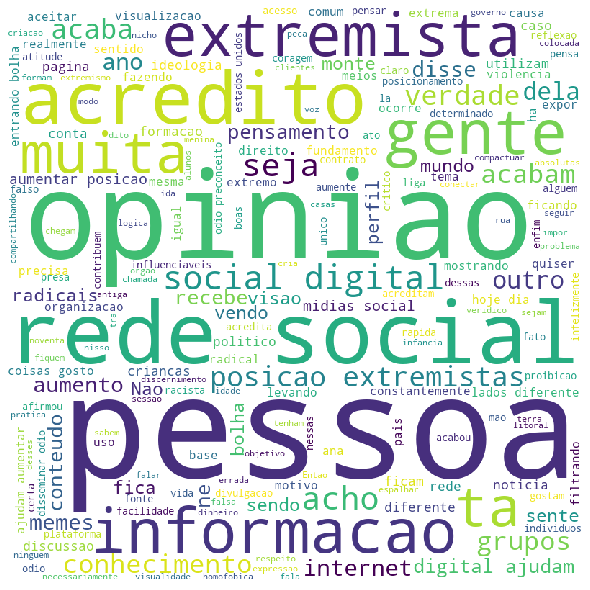

In [46]:
#Cria a wordcloud de unigramas
wordcloud = WordCloud(width = 800, height = 800,stopwords=stopwords,
                background_color ='white', 
                min_font_size = 10).generate(str(textolimpo)) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

In [47]:
#Agrupamento de bigramas
bigrams_list = list(nltk.bigrams(limpo))
print(bigrams_list[:25])
bigramas = [' '.join(word) for word in bigrams_list]
print(bigramas[:25])

[('Voce', 'acredita'), ('acredita', 'rede'), ('rede', 'social'), ('social', 'digital'), ('digital', 'ajudam'), ('ajudam', 'aumentar'), ('aumentar', 'exposicao'), ('exposicao', 'extremistas'), ('extremistas', 'opiniao'), ('opiniao', 'Acredito'), ('Acredito', 'Isso'), ('Isso', 'usuarios'), ('usuarios', 'influenciado'), ('influenciado', 'facilmente'), ('facilmente', 'opiniao'), ('opiniao', 'terceiros'), ('terceiros', 'investigar'), ('investigar', 'opiniao'), ('opiniao', 'fonte'), ('fonte', 'fundamento'), ('fundamento', 'ajudando'), ('ajudando', 'espalhar'), ('espalhar', 'cliques'), ('cliques', 'ninhosAcredito'), ('ninhosAcredito', 'clientes')]
['Voce acredita', 'acredita rede', 'rede social', 'social digital', 'digital ajudam', 'ajudam aumentar', 'aumentar exposicao', 'exposicao extremistas', 'extremistas opiniao', 'opiniao Acredito', 'Acredito Isso', 'Isso usuarios', 'usuarios influenciado', 'influenciado facilmente', 'facilmente opiniao', 'opiniao terceiros', 'terceiros investigar', 'in

In [48]:
#Contador de bigramas
s = pd.Series(Counter([y for y in bigramas]))
contagem_bi = s.sort_values(ascending = False)
contagem_bi[0:5]

rede social            40
social digital         14
posicao extremistas    13
digital ajudam          7
midias social           6
dtype: int64

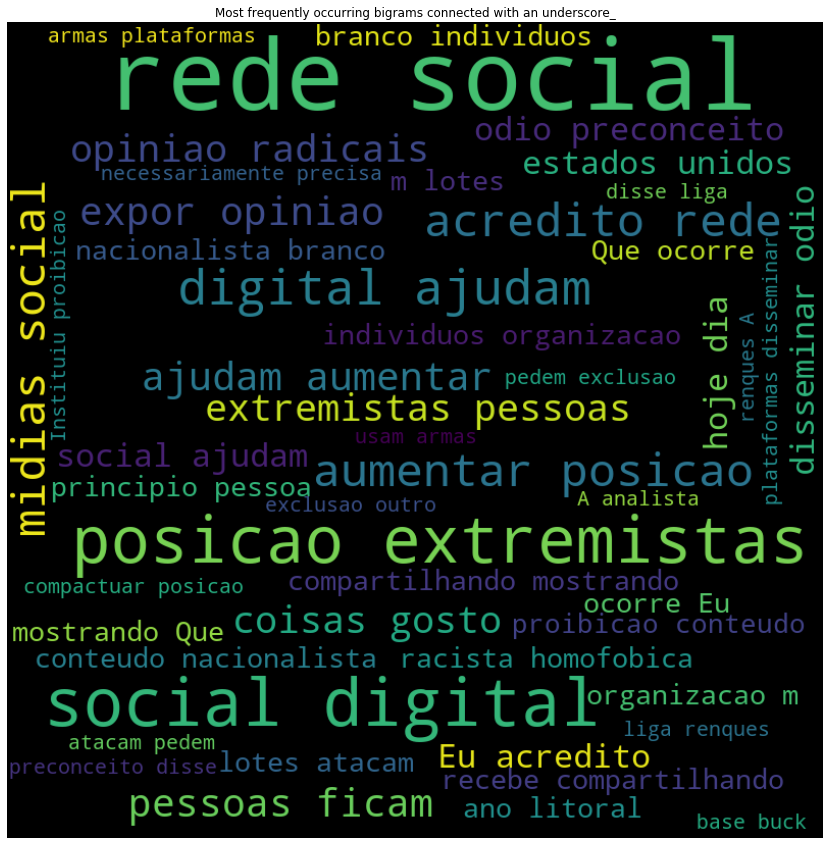

In [49]:
#Cria wordcloud de bigramas
WC_height = 800
WC_width = 800
WC_max_words = 50
 
wordCloud = WordCloud(max_words=WC_max_words, height=WC_height, width=WC_width, stopwords=stopwords)
 
wordCloud.generate_from_frequencies(contagem_bi)
 
plt.figure(figsize = (15, 15), facecolor = None) 
plt.title('Most frequently occurring bigrams connected with an underscore_')
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis("off")
plt.show()

                    bigram  count
0           (rede, social)     40
1        (social, digital)     14
2   (posicao, extremistas)     13
3        (digital, ajudam)      7
4         (acredito, rede)      6
5      (aumentar, posicao)      6
6         (midias, social)      6
7       (ajudam, aumentar)      4
8         (pessoas, ficam)      4
9         (expor, opiniao)      4
10     (opiniao, radicais)      4
11  (extremistas, pessoas)      4
12         (coisas, gosto)      4
13          (Eu, acredito)      3
14             (hoje, dia)      3
15      (disseminar, odio)      3
16     (odio, preconceito)      3
17        (social, ajudam)      3
18       (estados, unidos)      3
19     (fonte, fundamento)      2
20        (clientes, rede)      2
21     (internet, pessoas)      2
22       (ajudam, pessoas)      2
23         (ficam, fiquem)      2
24   (fiquem, extremistas)      2


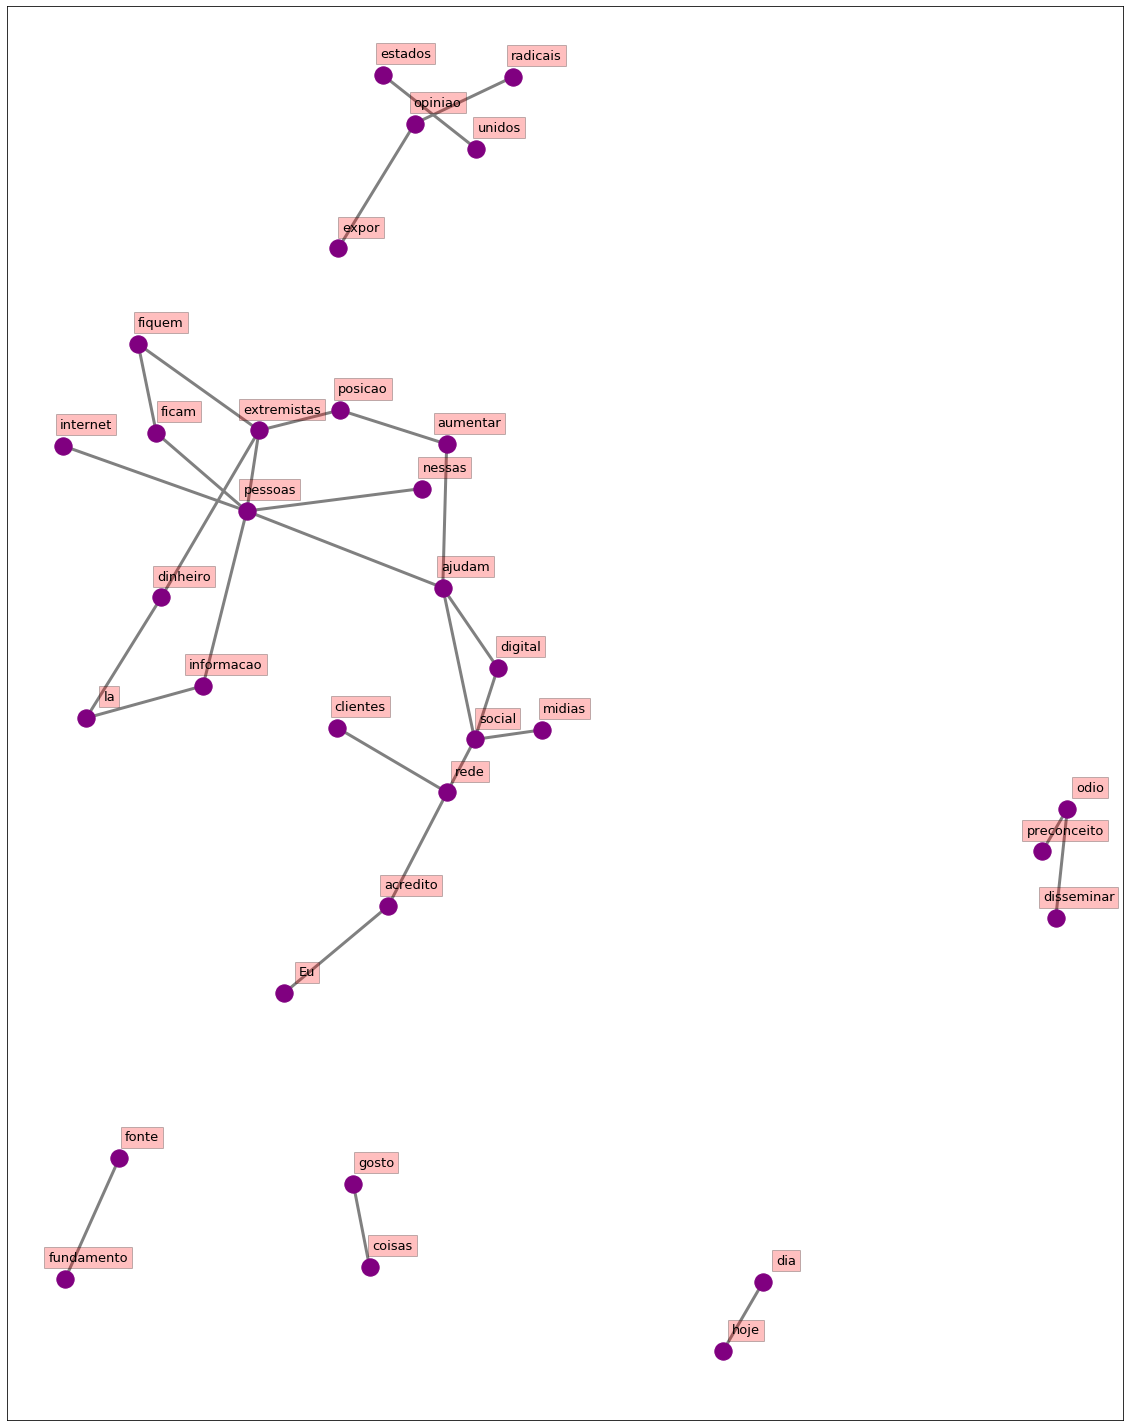

<Figure size 360x360 with 0 Axes>

In [50]:
#Grafos bigramas
bigram_counts = Counter(bigrams_list)

bigram_df = pd.DataFrame(bigram_counts.most_common(30),
                             columns=['bigram', 'count'])

print(bigram_df[:25])

d = bigram_df.set_index('bigram').T.to_dict('records')
# Create network plot 
G = nx.Graph()

# Create connections between nodes
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v * 10))

fig, ax = plt.subplots(figsize=(20, 26))

pos = nx.spring_layout(G, k=1)

# Plot networks
nx.draw_networkx(G, pos,
                 font_size=16,
                 width=3,
                 edge_color='grey',
                 node_color='purple',
                 with_labels = False,
                 ax=ax)

# Create offset labels
for key, value in pos.items():
    x, y = value[0]+.035, value[1]+.025
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='red', alpha=0.25),
            horizontalalignment='center', fontsize=13)
plt.figure(figsize = (5, 5)) 
    
plt.show()

In [51]:
#Agrupamento de trigramas
trigrams_list = list(nltk.trigrams(limpo))
print(trigrams_list[:25])
trigramas = [' '.join(word) for word in trigrams_list]
print(trigramas[:25])

[('Voce', 'acredita', 'rede'), ('acredita', 'rede', 'social'), ('rede', 'social', 'digital'), ('social', 'digital', 'ajudam'), ('digital', 'ajudam', 'aumentar'), ('ajudam', 'aumentar', 'exposicao'), ('aumentar', 'exposicao', 'extremistas'), ('exposicao', 'extremistas', 'opiniao'), ('extremistas', 'opiniao', 'Acredito'), ('opiniao', 'Acredito', 'Isso'), ('Acredito', 'Isso', 'usuarios'), ('Isso', 'usuarios', 'influenciado'), ('usuarios', 'influenciado', 'facilmente'), ('influenciado', 'facilmente', 'opiniao'), ('facilmente', 'opiniao', 'terceiros'), ('opiniao', 'terceiros', 'investigar'), ('terceiros', 'investigar', 'opiniao'), ('investigar', 'opiniao', 'fonte'), ('opiniao', 'fonte', 'fundamento'), ('fonte', 'fundamento', 'ajudando'), ('fundamento', 'ajudando', 'espalhar'), ('ajudando', 'espalhar', 'cliques'), ('espalhar', 'cliques', 'ninhosAcredito'), ('cliques', 'ninhosAcredito', 'clientes'), ('ninhosAcredito', 'clientes', 'rede')]
['Voce acredita rede', 'acredita rede social', 'rede s

In [52]:
#Contador de trigramas
s = pd.Series(Counter([y for y in trigramas]))
contagem_tri = s.sort_values(ascending = False)
contagem_tri[0:5]

rede social digital             8
social digital ajudam           7
aumentar posicao extremistas    6
acredito rede social            6
midias social digital           6
dtype: int64

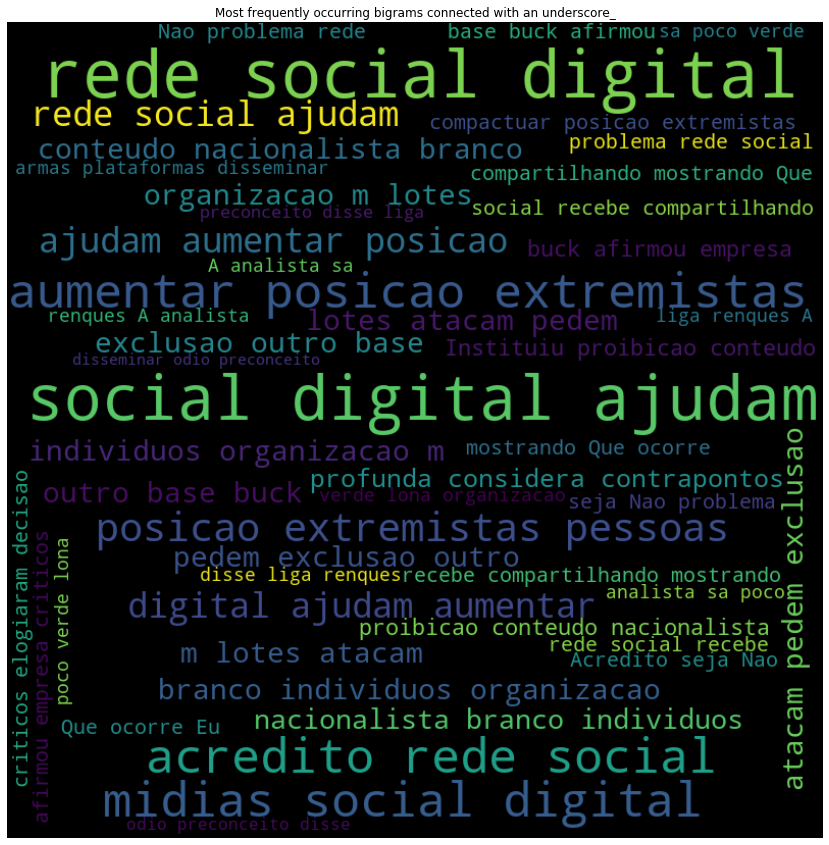

In [53]:
#Cria a wordcloud de trigramas

WC_height = 800
WC_width = 800
WC_max_words = 50
 
wordCloud = WordCloud(max_words=WC_max_words, height=WC_height, width=WC_width, stopwords=stopwords)
 
wordCloud.generate_from_frequencies(contagem_tri)
 
plt.figure(figsize = (15, 15), facecolor = None) 
plt.title('Most frequently occurring bigrams connected with an underscore_')
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis("off")
plt.show()

                             trigram  count
0            (rede, social, digital)      8
1          (social, digital, ajudam)      7
2           (acredito, rede, social)      6
3   (aumentar, posicao, extremistas)      6
4          (midias, social, digital)      6
5    (posicao, extremistas, pessoas)      4
6        (digital, ajudam, aumentar)      3
7        (ajudam, aumentar, posicao)      3
8             (rede, social, ajudam)      3
9           (clientes, rede, social)      2
10        (digital, ajudam, pessoas)      2
11          (ajudam, pessoas, ficam)      2
12          (pessoas, ficam, fiquem)      2
13      (ficam, fiquem, extremistas)      2
14   (fiquem, extremistas, dinheiro)      2
15       (extremistas, dinheiro, la)      2
16        (dinheiro, la, informacao)      2
17         (la, informacao, pessoas)      2
18     (informacao, pessoas, nessas)      2
19       (pessoas, nessas, formacao)      2
20        (nessas, formacao, alunos)      2
21       (formacao, alunos, aume

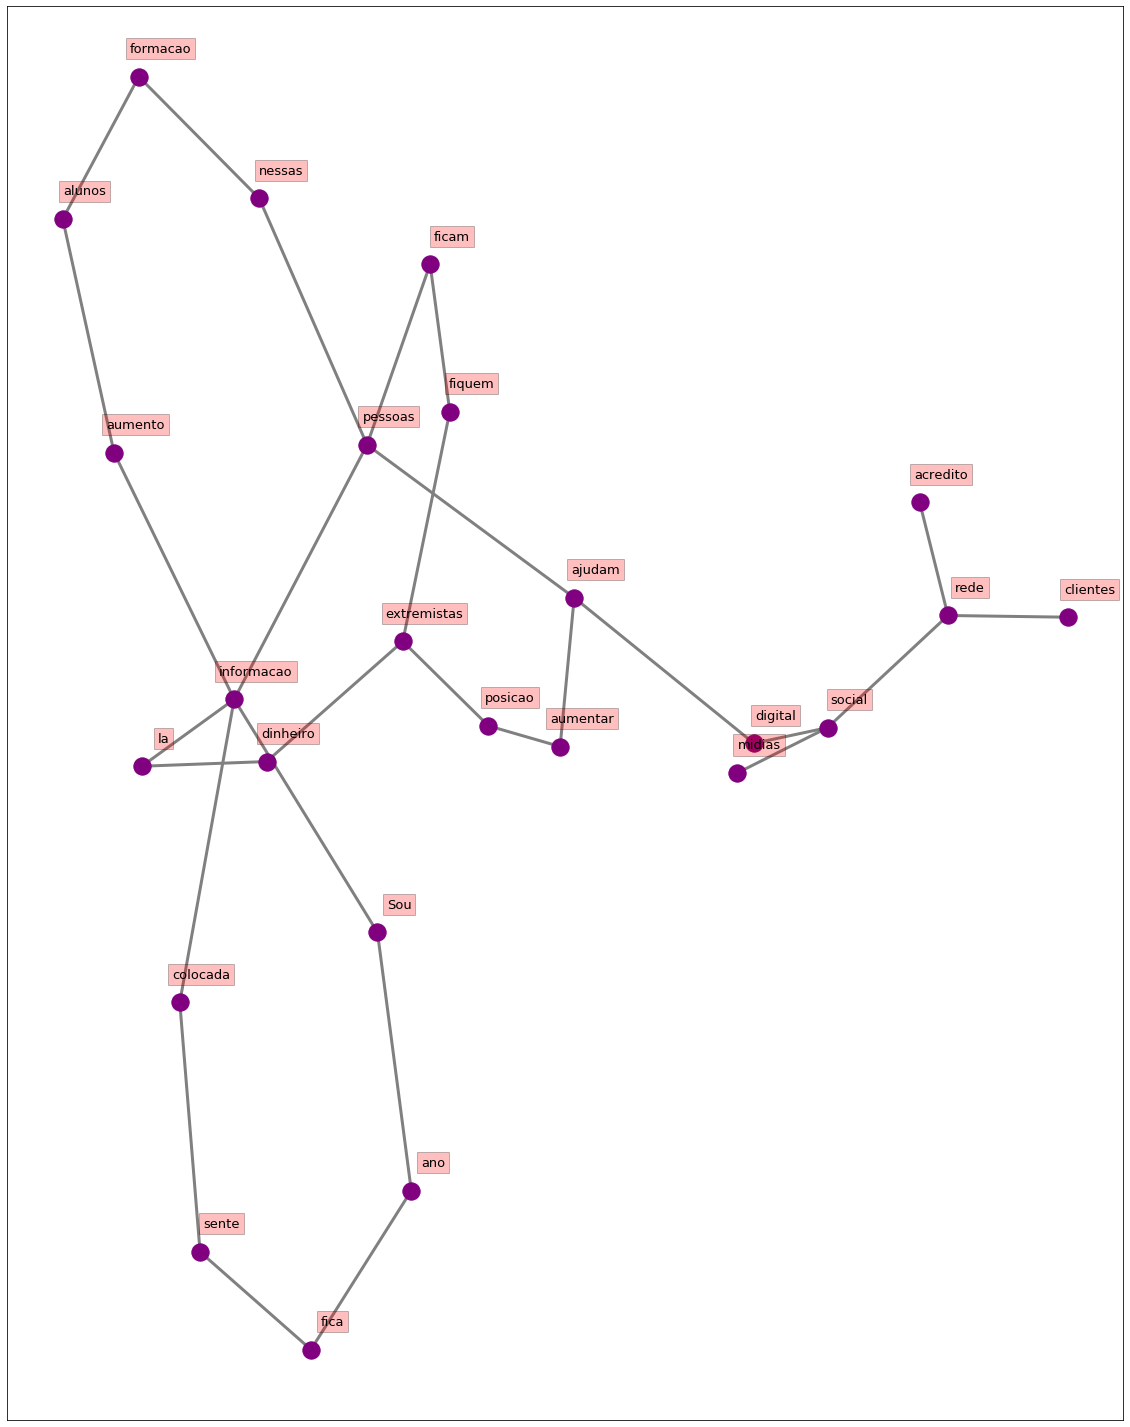

<Figure size 360x360 with 0 Axes>

In [54]:
#Grafos trigramas
trigram_counts = Counter(trigrams_list)

trigram_df = pd.DataFrame(trigram_counts.most_common(30),
                             columns=['trigram', 'count'])

print(trigram_df[:25])

d = trigram_df.set_index('trigram').T.to_dict('records')
# Create network plot 
G = nx.Graph()

# Create connections between nodes
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v * 10))

fig, ax = plt.subplots(figsize=(20, 26))

pos = nx.spring_layout(G, k=1)

# Plot networks
nx.draw_networkx(G, pos,
                 font_size=16,
                 width=3,
                 edge_color='grey',
                 node_color='purple',
                 with_labels = False,
                 ax=ax)

# Create offset labels
for key, value in pos.items():
    x, y = value[0]+.035, value[1]+.025
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='red', alpha=0.25),
            horizontalalignment='center', fontsize=13)
plt.figure(figsize = (5, 5)) 
    
plt.show()

In [0]:
obrigado <3